In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ast import literal_eval

In [4]:
headsets_df = pd.read_csv('headsets.csv')
print(headsets_df.head())
print(headsets_df.dtypes)

   brand                             model form_factor  \
0  1MORE                         EHD9001TA      In Ear   
1  1MORE                       Quad Driver      In Ear   
2  1MORE        Triple Driver (Black/Gold)      In Ear   
3  1MORE            Triple Driver (Silver)      In Ear   
4  1MORE  Triple Driver Lightning (Silver)      In Ear   

                               frequency_response  has_microphone  \
0                                             NaN           False   
1  {'min': 20.0, 'max': 40000.0, 'default': None}            True   
2  {'min': 20.0, 'max': 40000.0, 'default': None}            True   
3  {'min': 20.0, 'max': 40000.0, 'default': None}            True   
4  {'min': 20.0, 'max': 40000.0, 'default': None}            True   

   is_wireless    type         color              price  
0         True  Closed   Black / Red    ['USD', '0.00']  
1        False  Closed   Black / Red  ['USD', '124.23']  
2        False  Closed  Black / Gold   ['USD', '79.98']  
3   

In [5]:
# Extract numeric value from price column
print(type(headsets_df['price'].iloc[0]))

headsets_df['price_usd'] = headsets_df['price'].apply(
    lambda x: float(literal_eval(x)[1]) if isinstance(x, str) else None
)

print(headsets_df['price_usd'].head())
print(headsets_df['price_usd'].describe())

<class 'str'>
0      0.00
1    124.23
2     79.98
3     67.98
4     84.95
Name: price_usd, dtype: float64
count    2417.000000
mean       41.746752
std       148.566701
min         0.000000
25%         0.000000
50%         0.000000
75%        24.990000
max      3799.000000
Name: price_usd, dtype: float64


0
count     744.000000
mean      135.620833
std       242.946347
min         4.990000
25%        32.562500
50%        70.290000
75%       158.902500
max      3799.000000
Name: price_usd, dtype: float64


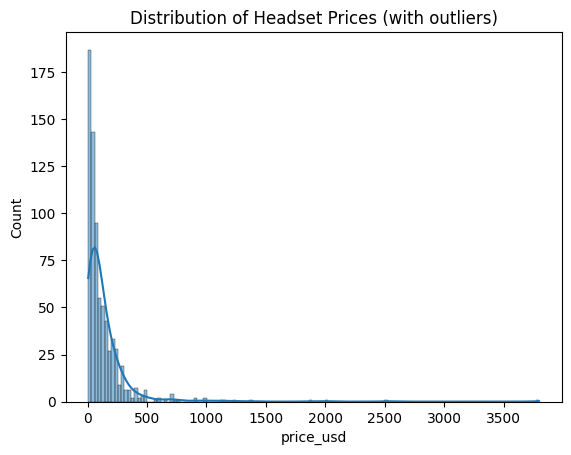

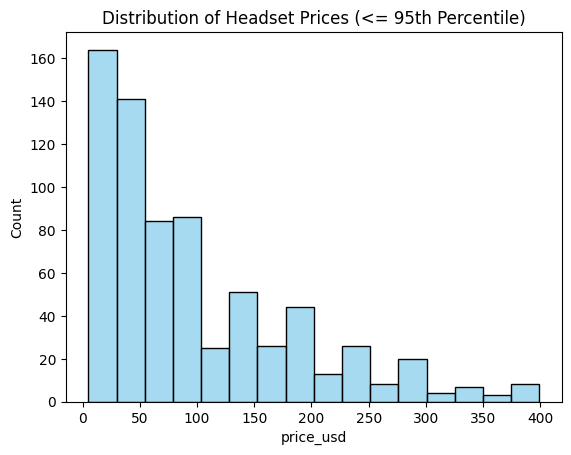

In [13]:
# Price Distribution
print((headsets_df['price_usd'] == 0).sum()) # total of 1673 zeros so we drop these rows

headsets_df = headsets_df[headsets_df['price_usd'] > 0].copy()
print(headsets_df['price_usd'].describe())

# With outliers
sns.histplot(headsets_df['price_usd'], kde=True)
plt.title('Distribution of Headset Prices (with outliers)')
plt.show()

# Dropped outliers/remove top 5% of highest prices
price_95 = headsets_df['price_usd'].quantile(0.95)
filtered_prices = headsets_df[headsets_df['price_usd'] <= price_95]['price_usd']
sns.histplot(filtered_prices, color='skyblue')
plt.title('Distribution of Headset Prices (<= 95th Percentile)')
plt.show()

In [7]:
brand_summary = headsets_df.groupby('brand')['price_usd'].agg(['count', 'mean', 'median']).sort_values(by='count', ascending=False)
print(brand_summary.head(20))

                    count        mean   median
brand                                         
Sennheiser             76  220.404605  154.495
Audio-Technica         56  132.253571   84.270
Logitech               36  109.948333   81.815
Panasonic              31   25.671613   15.990
Philips                28   51.600000   26.755
Koss                   27   30.530370   30.940
Corsair                23  118.969130   97.990
Final Audio Design     22  655.981364  273.020
Skullcandy             22   59.289091   65.045
SteelSeries            22  168.621364  154.400
Sony                   21  176.033810  149.000
Cyber Acoustics        19   23.630000   19.440
Razer                  18  122.855000  114.990
Beyerdynamic           18  432.901667  199.000
AKG                    18  177.097222  166.890
Creative Labs          18  107.801667   65.790
Syba                   17   34.401765   30.120
Astro                  14  178.540714  214.495
Kingston               14  118.407143  117.055
Turtle Beach 

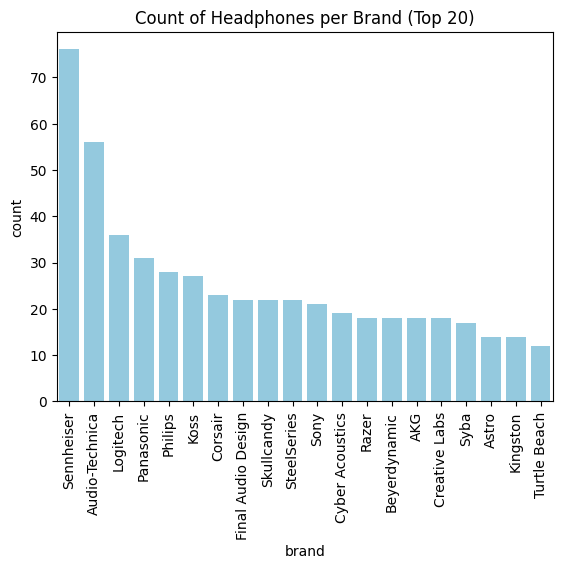

In [14]:
# Most common brands
common_brands = headsets_df['brand'].value_counts().nlargest(20).index
sns.countplot(data=headsets_df[headsets_df['brand'].isin(common_brands)],
              x='brand',
              order=common_brands,
              color='skyblue')
plt.xticks(rotation=90)
plt.title('Count of Headphones per Brand (Top 20)')
plt.show()

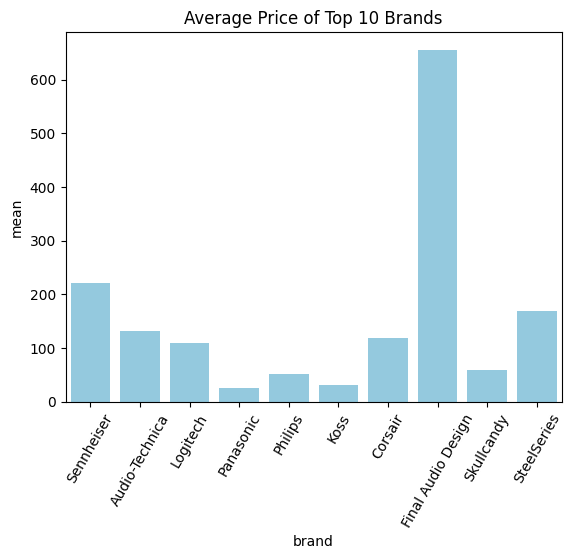

In [15]:
sns.barplot(data=brand_summary.head(10), x='brand', y='mean', color='skyblue')
plt.xticks(rotation=60)
plt.title("Average Price of Top 10 Brands")
plt.show()

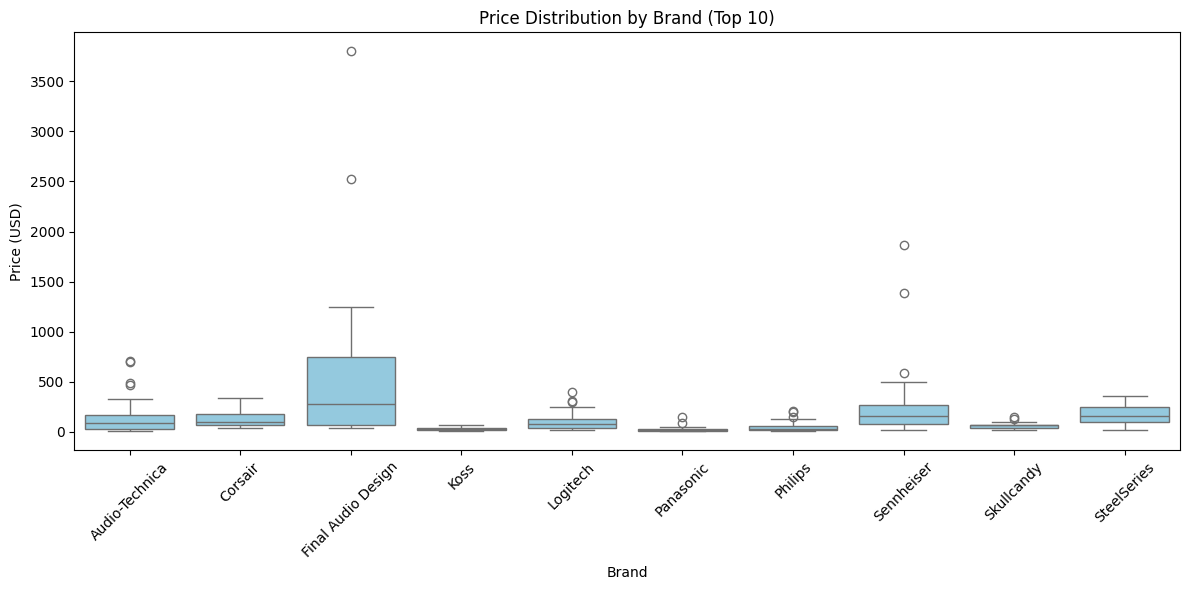

In [16]:
top10_brands = headsets_df['brand'].value_counts().nlargest(10).index
headsets_df_top10 = headsets_df[headsets_df['brand'].isin(top10_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=headsets_df_top10, x='brand', y='price_usd', color='skyblue')
plt.xticks(rotation=45)
plt.title('Price Distribution by Brand (Top 10)')
plt.xlabel('Brand')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()